In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from mpl_toolkits import mplot3d

In [ ]:
def polynomial(coef, X, degree):
    x = np.array(np.ones(X.shape))
    for i in range(1, degree+1):
        x = np.c_[x, X**i]
    return np.inner(coef, x)

In [ ]:
def showData(data, *args, elev=None, azz=None, **kwargs):
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    Z =  np.zeros(X.shape)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.scatter3D(data[:,0], data[:,1], data[:, 2], cmap=cm.coolwarm, antialiased=False)
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 2)
    if(args != ()):
        time = np.linspace(1, 55, 80)
        if(kwargs['pltType'] == 'llp'):
            ax.plot(polynomial(args[0], time, 1), polynomial(args[1], time, 1),polynomial(args[2], time, 2), c='orange', linewidth=3)
        elif(kwargs['pltType'] == 'lll'):
            ax.plot(polynomial(args[0], time, 1), polynomial(args[1], time, 1),polynomial(args[2], time, 1), c='orange', linewidth=3)
    ax.view_init(elev, azz)
    plt.show()



x = ax1 * t + ax2 <br />
y = ay1 * t + ay2 <br />
z = az1 * t + az2 <br />

In [ ]:
def showAxis (X, Y, *args):
    plt.scatter(X, Y)
    if (args != ()):
        plt.plot(X, args[0], c='orange')
    plt.show()

In [ ]:
def errorDeviation(x, y, coef):
    y_hat = np.dot(x, coef)
    a = 2/x.shape[0] * np.dot(x.T, (np.dot(x, coef) - y))
    return a

In [ ]:
def linearRegression(X, y, n_epoch = 10000, alfa=0.001):
    x = np.c_[np.ones(X.shape[0]), X]
    coef = [y[0], y[len(y)-1]-y[0]/19]
    for i in range(n_epoch):
        coef = coef - alfa * errorDeviation(x, y, coef)
    return coef
    


In [ ]:
def breakColuns(matrix, axis):
    return matrix[:,axis]

In [ ]:
kick1 = np.genfromtxt('kick1.dat')
#showData(kick1)
#showAxis(kick1, 0)
#showAxis(kick1, 1)
#showAxis(kick1, 2)

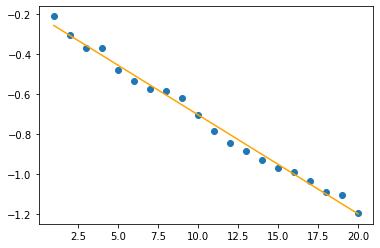

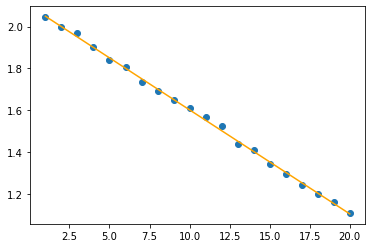

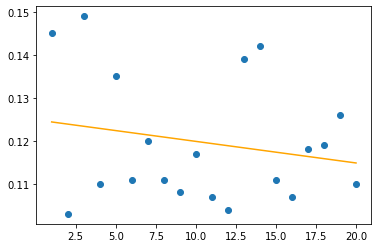

In [ ]:
X = breakColuns(kick1, 0)
Y = breakColuns(kick1, 1)
Z = breakColuns(kick1, 2)
time = np.arange(1,21)
coefX = linearRegression(time, X)
X_prev = polynomial(coefX, time, 1)
showAxis(time, X, X_prev)
coefY = linearRegression(time, Y)
Y_prev = polynomial(coefY, time, 1)
showAxis(time, Y, Y_prev)
coefZ = linearRegression(time, Z)
Z_prev = polynomial(coefZ, time, 1)
showAxis(time, Z, Z_prev)



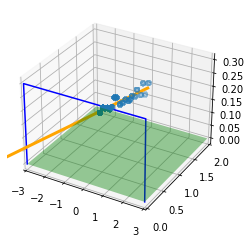

In [ ]:
showData(kick1, coefX, coefY, coefZ, pltType='lll')

In [ ]:
def closerToZero(X):
    if(len(X)>0):
        close0 = 0
        for i in range(len(X)):
            if(abs(X[i])<abs(X[close0])):
                close0 = i
        return close0
    return -1

In [ ]:
def isNaNorInf(X):
    for x in X:
        if(math.isinf(x) or math.isnan(x)):
            return True
    return False

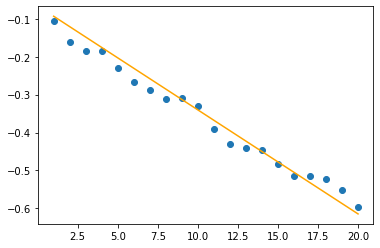

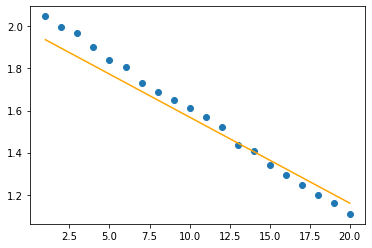

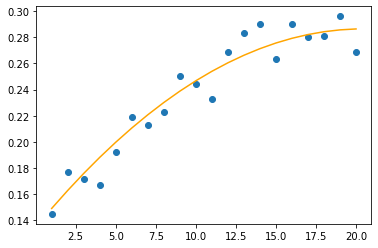

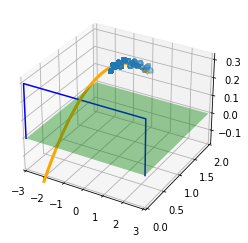

In [ ]:
def polinomialRegression(X, y, degree, n_epoch=100000, alfa=0.000001):
    x = np.ones(X.shape[0])
    for i in range(1, degree+1):
        x = np.c_[x, X**i]

    #Aproximação do valor inicial
    if(degree == 1):
        close0 = closerToZero(X)
        coef = [y[close0], y[len(y)-1]-y[0]/19]
    elif(degree == 2):
        vertex_y = max(y)
        if(abs(min(y))> abs(vertex_y)):
            vertex_y = min(y)
        vertex_x = np.where(y == vertex_y)[0][0]
        close0 = closerToZero(X)
        c = y[close0]
        a = (vertex_y + c)/vertex_x
        b = -2*a*vertex_x
        coef = [c,a,b]
    else:
        coef = np.random.randn(x.shape[1])

    for j in range(n_epoch):
        old_coef = np.copy(coef)
        y_hat = np.dot(x, coef)
        derivation = (2/x.shape[0])*np.dot(x.T, (y_hat - y))
        coef -= alfa*derivation
        if(isNaNorInf(coef)):
            return(old_coef)

    return coef

kick2 = np.genfromtxt('kick2.dat')
X = breakColuns(kick2, 0)
Y = breakColuns(kick2, 1)
Z = breakColuns(kick2, 2)
coefX = polinomialRegression(time, X, 1)
X_prev = polynomial(coefX, time, 1)
showAxis(time, X, X_prev)
coefY = polinomialRegression(time, Y, 1)
Y_prev = polynomial(coefY, time, 1)
showAxis(time, Y, Y_prev)
coefZ = polinomialRegression(time, Z, 2, alfa=0.00001)
Z_prev = polynomial(coefZ, time, 2)
showAxis(time, Z, Z_prev)
showData(kick2, coefX, coefY, coefZ, pltType='llp')

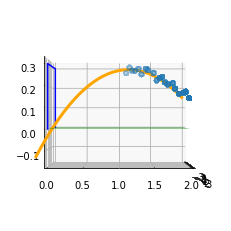

In [ ]:
showData(kick2, coefX, coefY, coefZ, pltType='llp', elev=0, azz=0)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f96ded6d-d068-4049-b80f-7d8e29514f85' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>